In [528]:
%pylab
%matplotlib inline 
import pandas as pd
import pyecharts
import seaborn as sns
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
sns.set()
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [529]:
AR = pd.read_csv('./data/2018各省市年龄与抚养比.csv')
GDP = pd.read_csv('./data/2018各省市生产总值.csv')
GDP_T = pd.read_csv('./data/1978-2018生产总值.csv')
MT = pd.read_csv('./data/med.csv') # 医疗水平
ED = pd.read_csv('./data/edu.csv') # 教育水平
UAR = pd.read_csv('./data/2010-2018各省市城市人口比重.csv')
SEX = pd.read_csv('./data/2018各省市性别比例.csv')
IN = pd.read_csv('./data/2018各省市工业化水平.csv')
AS = pd.read_csv('./data/2018年龄段性别比例.csv')
AS_T = pd.read_csv('./data/1982-2018年龄结构.csv')
SU = pd.read_csv('./data/1949-2018性别城乡分布.csv')

In [530]:
AS_T.head()

,年份,0-14岁比重,15-64岁比重,65岁及以上比重
0,1982,33.59,61.50,4.91
1,1987,28.68,65.86,5.40
2,1990,27.69,66.74,5.57
3,1991,27.71,66.30,5.99
4,1992,27.60,66.24,6.16


In [531]:
# 展示数据
for df in [AR, GDP, MT, ED, UAR, SEX, IN, AS, SU, GDP_T]:
    display(df.head(2))

,地区,人口数,0-14岁,15-64岁,65岁及以上,总抚养比,少年儿童抚养比,老年人口抚养比,老龄化比率
0,全国,1144648,192963,815039,136645.26,40.44,23.68,16.77,0.119378
1,北京,17673,1850,13834,1988.79,27.75,13.37,14.38,0.112533


,地区,生产总值,总值第一产业,总值第二产业,总值第三产业,人均地区生产总值,人均总值第一产业,人均总值第二产业,人均总值第三产业,地区生产总值指数,第一产业指数,第二产业指数,第三产业指数,人均地区生产总值.1
0,北 京,30319.98,118.69,5647.65,24553.64,140211.241878,0.39,18.63,80.98,106.6,97.7,104.2,107.3,107.093618
1,天 津,18809.64,172.71,7609.81,11027.12,120710.801930,0.92,40.46,58.62,103.6,100.1,101.0,105.9,103.710112


,地区,人口集聚度,基层医疗机构数(张),卫生机构集聚度,卫生机构比值,床位数(张),床位数集聚度,床位数比值
0,江苏,5.464,29099.0,2.967,0.54,77546.0,5.150,0.95
1,山东,4.533,72904.0,4.960,1.11,115017.0,5.096,1.14


,地区,发展指数2017,发展指数19年版,创新指数2017,创新指数19年版,绿色指数2017,绿色指数19年版,综合指数2017,综合指数19年版
0,全国,5.51,5.51,3.31,3.24,8.51,8.59,5.62,5.62
1,北京,10.00,10.00,10.00,10.00,9.93,10.00,10.00,10.00


,地区,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,全 国,49.950000,51.27,52.57,53.73,54.77,56.1,57.35,58.52,59.58
1,北 京,85.959455,86.20,86.20,86.30,86.35,86.5,86.50,86.50,86.50


,地区,合计,男,女
0,全 国,1144648,585299,559349
1,北 京,17673,8781,8892


,地区,工业化综合指数
0,北京,100
1,天津,100


,年龄段,人口总数,男,女
0,总计,1144648,585299,559349
1,0-4,67393,35887,31506


,年份,总人口(年末),男性人口数,男性比重,女性人口数,女性比重,城镇人口数,城镇比重,乡村人口数,乡村比重
0,1949,54167,28145.0,51.959680,26022.0,48.040320,5765,10.643011,48402,89.356989
1,1950,55196,28669.0,51.940358,26527.0,48.059642,6169,11.176535,49027,88.823465


,年份,总值
0,1978,3593.0
1,1979,3865.8


In [532]:
def get_data(log=False):
    '''提取数据'''
    data = AS_T.iloc[12:, 0] # 从 2000 年开始统计
    for df in [GDP_T, 
               SU[['年份', '男性比重','女性比重',  '城镇比重', '乡村比重']], 
               AS_T[['年份', '65岁及以上比重']]
              ]:
        data = pd.merge(data, df, on='年份', how='left')
    # data[[ '男性比重','女性比重',  '城镇比重', '乡村比重', '65岁及以上比重']]
    data.columns = ['年份', 'GDP', '男性比重','女性比重',  '城镇比重', '乡村比重', '65岁及以上比重']
    data['GDP'] = data['GDP'].map(lambda x: np.log(x))
    if log==True:
        data = data.apply(lambda x: np.log(x))
    data.set_index('年份')
    data = data.iloc[: ,[1, 3, 4, -1]]
    return data

data = get_data()
data.head()

,GDP,女性比重,城镇比重,65岁及以上比重
0,10.837357,48.370000,36.220000,6.96
1,11.515723,48.370000,36.220000,6.96
2,11.595788,48.543803,37.660000,7.10
3,11.683190,48.529812,39.089784,7.30
4,11.778846,48.496831,40.530230,7.50


In [533]:
# 查看相关性
data.corr()['65岁及以上比重'].to_frame()

,65岁及以上比重
GDP,0.944120
女性比重,0.927944
城镇比重,0.974475
65岁及以上比重,1.000000


<AxesSubplot:>

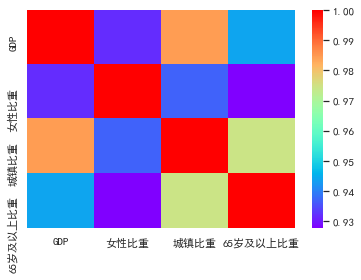

In [534]:
# 可视化相关性
sns.heatmap(data.corr(), cmap='rainbow')

In [535]:
# 划分数据, 2000-2013拟合, 2013-2018验证
split_index = 16
X_train, y_train, X_test, y_test = data.iloc[:split_index, :-1].values, data.iloc[:split_index, -1].values, \
data.iloc[split_index:, :-1].values, data.iloc[split_index:, -1].values

In [536]:
# 定比检测 [0.982, 1.0098]之间可使用
for i in range(len(X_train)-1):
    print(X_train[i] / X_train[i+1])

[0.94109222 1.         1.        ]
[0.99309533 0.99641966 0.96176314]
[0.99251892 1.0002883  0.96342308]
[0.991879   1.00068007 0.96445996]
[0.99188704 1.00044533 0.97055128]
[0.99099494 1.00005191 0.97138897]
[0.98702944 1.         1.        ]
[0.99023309 0.99985    0.9694907 ]
[0.98926432 0.99958763 0.9663071 ]
[0.99262109 0.99938183 0.97658749]
[0.99285671 0.99938221 0.97201467]
[0.9920266  0.99651139 0.96780781]
[0.98045711 1.         1.        ]
[0.99299413 0.99979483 0.97425395]
[0.99421971 0.99979487 0.97527107]


In [537]:
'''灰度预测模型'''
class GM():
    def __init__(self, params=None):
        self.params = params
    
    def fit(self, X):
        self.X = X
        X_cumsum = np.cumsum(X)
        Z = - (X_cumsum[1:] + X_cumsum[:-1]) / 2
        Y = X[1:]
        B = np.array([Z, np.ones(len(Z))]).T
        self.a, self.b = np.dot(np.dot( np.linalg.inv(np.dot(B.T, B)), B.T), Y)
        
    def transform(self):
        res = []
        X = self.X
        res.append(X[0])
        a, b = self.a, self.b
        for k in range(1, len(self.X)):
            tmp = (X[0] - b / a) * np.exp(-a * k) + b / a
            res.append(tmp)
        res = np.array(res)
        X[1:] = res[1:] + res[0:-1]
        return X
    
    def predict(self, length=0):
        pred = [0]*length
        res = []
        a, b = self.a, self.b
        for k in range(len(self.X)- 1, len(self.X) + length):
            tmp = (self.X[0] - b / a) * np.exp(-a * k) + b / a
            res.append(tmp)
        res = np.array(res)
        pred = res[1:] - res[0:-1]
        return pred
        

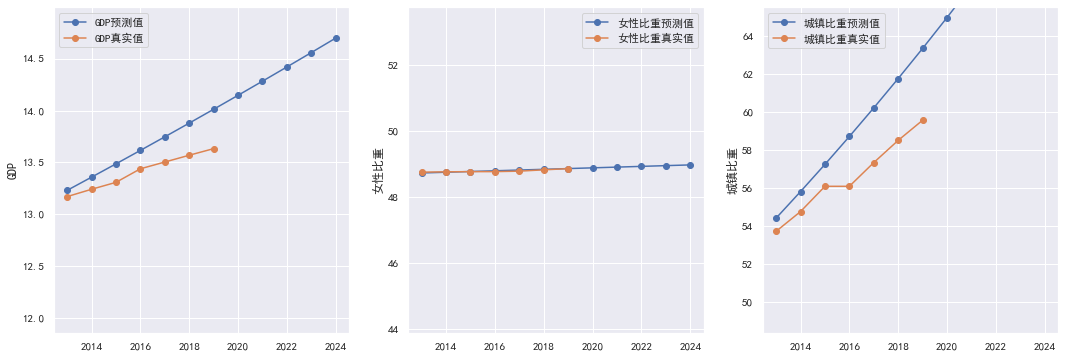

In [538]:
# 拟合并可视化(seaborn 版本)
gm = GM()

X_label = ['年份']*3
Y_label = ['GDP', '女性比重', '城镇比重']

plt.figure(figsize=(18, 6))
for i in range(3):
    plt.subplot(131 + i)
    N = len(X_test) + 5 # 预测年分数
    XX = np.arange(N) + 2013
    gm.fit(X_train[:, i])
    plt.plot(XX, gm.predict(N), '-o',  label=Y_label[i] + '预测值')
    plt.plot(np.arange(len(X_test)) + 2013, X_test[:, i], '-o', label=Y_label[i] + '真实值')
    plt.ylim(X_test[:, i].min()*0.9, X_test[:, i].max()*1.1)
    plt.legend()
    plt.ylabel(Y_label[i])
plt.show()

In [539]:
gm = GM()
gm.fit(X_train[:, 0])
gm.transform()

array([ 10.83735687,  33.13802014,  56.17474459,  79.43275002,
       102.91416196, 126.62112637, 150.5558098 , 174.72039963,
       199.11710424, 223.74815322, 248.61579759, 273.72230999,
       299.06998487, 324.66113874, 350.49811036, 376.58326095])

In [540]:
X_train[:, 0]

array([ 10.83735687,  33.13802014,  56.17474459,  79.43275002,
       102.91416196, 126.62112637, 150.5558098 , 174.72039963,
       199.11710424, 223.74815322, 248.61579759, 273.72230999,
       299.06998487, 324.66113874, 350.49811036, 376.58326095])

In [541]:
# 多元回归
from sklearn import linear_model

gm = GM()

X_train_transform = []
X_test_transform = []
for i in range(3):
    gm.fit(X_train[:, i])
    X_train_transform.append(gm.transform().T)
    
X_train_transform = np.array(X_train_transform).T

clf = linear_model.LinearRegression().fit(X_train_transform, y_train)
print(clf.intercept_)
print(clf.coef_)

6.886862299235327
[0.00020291 0.00068735 0.00019612]


In [545]:
evaluate_model(clf, X_train, X_test, y_train, y_test)

解释方差(越接近1越好)： 7.799797252516782e-09
r2_score(越接近1越好)： -39.7610523522577
平均绝对误差(越小越好)： 674674.994349749
均方误差(越小越好)： 466634393699.6377
中值绝对误差(越小越好)： 685985.9658825544


In [543]:
# 评估模型
from sklearn.metrics import accuracy_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score


def evaluate_model(clf, X_train, X_test, y_train=None, y_test=None):    
    if y_test is not None:
        clf.fit(X_train, y_train)
        predicted = clf.predict(X_test)
    else:
        clf.fit(X_train)
        predicted = clf.predict(len(X_test))
    
    EVS = explained_variance_score(expected, predicted)
    RS = r2_score(expected, predicted)
    MA =mean_absolute_error(expected, predicted)
    MSE = mean_squared_error(expected, predicted)
    MAE = median_absolute_error(expected, predicted)
    
    # 评价预测的准确性
    print('解释方差(越接近1越好)：', explained_variance_score(expected, predicted))  # 解释方差，越接近1越好
    print('r2_score(越接近1越好)：', r2_score(expected, predicted))  # r2 score 满分1，越接近1越好
    print('平均绝对误差(越小越好)：', mean_absolute_error(expected, predicted))  # 平均绝对误差，越小越好
    print('均方误差(越小越好)：', mean_squared_error(expected, predicted))  # 均方误差，越小越好
    print('中值绝对误差(越小越好)：', median_absolute_error(expected, predicted))  # 中值绝对误差，越小越好
    
for i in range(3):
    print()
    evaluate_model(gm, X_train[:, i], X_test[:, i])


解释方差(越接近1越好)： 0.10392178410362629
r2_score(越接近1越好)： -37.75139741247269
平均绝对误差(越小越好)： 658308.0035100648
均方误差(越小越好)： 443627771930.70496
中值绝对误差(越小越好)： 670629.3450956064

解释方差(越接近1越好)： 0.011262801177049808
r2_score(越接近1越好)： -39.429444228847714
平均绝对误差(越小越好)： 671951.6500423347
均方误差(越小越好)： 462838128719.13544
中值绝对误差(越小越好)： 683330.0736884432

解释方差(越接近1越好)： 0.011720056283916147
r2_score(越接近1越好)： -39.44445180383477
平均绝对误差(越小越好)： 672083.3743499661
均方误差(越小越好)： 463009936124.75555
中值绝对误差(越小越好)： 683471.1404205023
